# Week11 - Clustering Lab
- Create clusters for the following dataset
- Choose a meaningful cluster count
- Identify potential labels for each cluster

In [14]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import pandas as pd

def get_data():
    r = urllib2.urlopen("https://github.com/msaricaumbc/DS_data/blob/master/ds602/people_wiki.zip?raw=true").read()
    file = ZipFile(BytesIO(r))
    people_wiki_csv = file.open("people_wiki.csv")
    people = pd.read_csv(people_wiki_csv)
    people.drop('URI', inplace=True, axis=1)
    return people

people = get_data()
people.head()

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [15]:
people

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...
42781,Motoaki Takenouchi,motoaki takenouchi born july 8 1967 saitama pr...
42782,"Alan Judge (footballer, born 1960)",alan graham judge born 14 may 1960 is a retire...
42783,Eduardo Lara,eduardo lara lozano born 4 september 1959 in c...
42784,Tatiana Faberg%C3%A9,tatiana faberg is an author and faberg scholar...


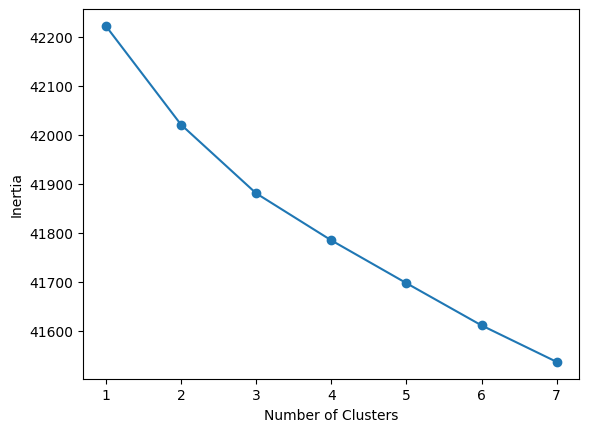

In [12]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
distortions = list()

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(people['text'])
for i in range(1, 8):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Chosen 5 clusters

In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# vectorize text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(people['text'])

# cluster data
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# get top words for each cluster
top_words = {}
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    top_words[i] = [terms[ind] for ind in order_centroids[i, :10]]



In [6]:
for i in range(5):
    print(f"Cluster {i} top words: {top_words[i]}")

Cluster 0 top words: ['music', 'album', 'band', 'released', 'orchestra', 'jazz', 'song', 'records', 'songs', 'albums']
Cluster 1 top words: ['league', 'season', 'team', 'played', 'football', 'coach', 'games', 'club', 'player', 'cup']
Cluster 2 top words: ['university', 'new', 'research', 'art', 'book', 'work', 'published', 'professor', 'american', 'born']
Cluster 3 top words: ['party', 'election', 'minister', 'law', 'served', 'member', 'elected', 'state', 'president', 'district']
Cluster 4 top words: ['film', 'theatre', 'television', 'films', 'series', 'award', 'actor', 'role', 'directed', 'festival']


### Experimenting with 7 clusters

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# vectorize text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(people['text'])

# cluster data
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X)

# get top words for each cluster
top_words = {}
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    top_words[i] = [terms[ind] for ind in order_centroids[i, :10]]
    


In [9]:
for i in range(7):
    top_words[i] = [terms[ind] for ind in order_centroids[i, :10]]
for i in range(7):
    print(f"Cluster {i} top words: {top_words[i]}")

Cluster 0 top words: ['league', 'baseball', 'major', 'season', 'games', 'runs', 'pitcher', 'played', 'minor', 'sox']
Cluster 1 top words: ['party', 'election', 'minister', 'served', 'member', 'elected', 'president', 'state', 'general', 'law']
Cluster 2 top words: ['film', 'new', 'art', 'television', 'work', 'series', 'award', 'book', 'york', 'born']
Cluster 3 top words: ['world', 'championships', 'won', 'tour', 'championship', 'team', 'olympics', 'race', 'racing', 'finished']
Cluster 4 top words: ['university', 'research', 'professor', 'science', 'institute', 'studies', 'law', 'phd', 'international', 'college']
Cluster 5 top words: ['music', 'album', 'band', 'released', 'orchestra', 'jazz', 'song', 'records', 'songs', 'albums']
Cluster 6 top words: ['season', 'football', 'league', 'played', 'team', 'coach', 'club', 'cup', 'player', 'games']


### Experimenting with 3 clusters

In [16]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# vectorize text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(people['text'])

# cluster data
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# get top words for each cluster
top_words = {}
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

C:\Users\WELCOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
for i in range(3):
    top_words[i] = [terms[ind] for ind in order_centroids[i, :10]]
for i in range(3):
    print(f"Cluster {i} top words: {top_words[i]}")

Cluster 0 top words: ['music', 'film', 'new', 'album', 'art', 'band', 'television', 'award', 'series', 'work']
Cluster 1 top words: ['league', 'season', 'team', 'played', 'football', 'games', 'coach', 'club', 'player', 'cup']
Cluster 2 top words: ['university', 'served', 'member', 'president', 'law', 'party', 'research', 'professor', 'minister', 'election']


#### if we choose 3 clusters, cluster 3 is not making sense as it contains overlapping words of both categories politics and Education and cannot identify a clear representative of the cluster . Hence optimal clusters would be 5

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# vectorize text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(people['text'])

# cluster data
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# get top words for each cluster
top_words = {}
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    top_words[i] = [terms[ind] for ind in order_centroids[i, :10]]


In [20]:
### labelling 5  clusters based on top words
labels = {}
labels[0] = "Musicians"
labels[1] = "Baseball players"
labels[2] = "Education"
labels[3] = "Politics"
labels[4] = "Entertainment"

# assign labels to data
people['cluster'] = kmeans.labels_
people['label'] = people['cluster'].apply(lambda x: labels[x])

# print top words for each cluster and cluster labels
for i in range(5):
    print(f"Cluster {i} top words: {top_words[i]}")
    
print(people[['name', 'text', 'label']])


Cluster 0 top words: ['music', 'album', 'band', 'released', 'orchestra', 'jazz', 'song', 'records', 'songs', 'albums']
Cluster 1 top words: ['league', 'season', 'team', 'played', 'football', 'coach', 'games', 'club', 'player', 'cup']
Cluster 2 top words: ['university', 'new', 'research', 'art', 'book', 'work', 'published', 'professor', 'american', 'born']
Cluster 3 top words: ['party', 'election', 'minister', 'law', 'served', 'member', 'elected', 'state', 'president', 'district']
Cluster 4 top words: ['film', 'theatre', 'television', 'films', 'series', 'award', 'actor', 'role', 'directed', 'festival']
                                     name  \
0                           Digby Morrell   
1                          Alfred J. Lewy   
2                           Harpdog Brown   
3                     Franz Rottensteiner   
4                                  G-Enka   
...                                   ...   
42781                  Motoaki Takenouchi   
42782  Alan Judge (footballer, 